In [1]:
import os

import numpy as np
import matplotlib.pyplot as plt

import main as ma

Example with a gaussian source and a point mass

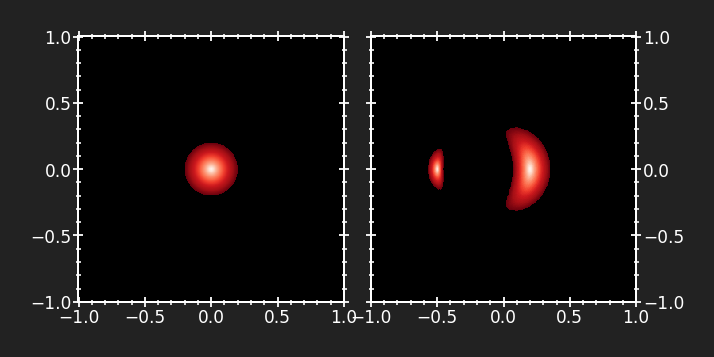

In [10]:
N_s = 601  # resolution Source Plane
N_i = 601  # resolution Image Plane  

lim_s = 1  # Spatial range Source Plane
lim_i = 1  # Spatial range Image Plane

source_plane = ma.Plane(lims=(-lim_s, lim_s), resolution=(N_s, N_s))
source_plane.add_circle_source(radius=0.2)  # add the light emitting source

image_plane = ma.Plane(lims=(-lim_i, lim_i), resolution=(N_i, N_i))

# Initialize the Gravitationa Lens system
Gl = ma.GravityLens(source_plane=source_plane,
                    image_plane=image_plane,)

Gl.add_point_lens(position=(0, 0.3), m=0.1)

# Do the computation
Gl.generate_image()
Gl.plot_source_image()

Example with an image

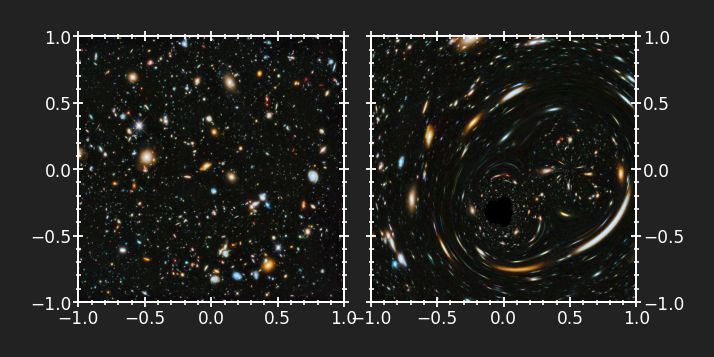

In [17]:
N_s = 1001  # resolution Source Plane
N_i = 601  # resolution Image Plane  

lim_s = 1  # Spatial range Source Plane

source_plane = ma.Plane(lims=(-lim_s, lim_s), resolution=(N_s, N_s), rgb=True)
image_path = '../images/hubble_deep_space.jpg'
source_plane.from_jpeg(image_path)  # add an image

image_plane = ma.Plane(lims=(-source_plane.x_lim, source_plane.y_lim), resolution=(N_i, N_i), rgb=True)

# Initialize the Gravitationa Lens system
Gl = ma.GravityLens(source_plane=source_plane,
                    image_plane=image_plane,
                    get_magmap=True  # This time we also compute the magnification map
                    )

# Let's add the two diferent lenses we defined in our class
Gl.add_point_lens(position=(0, 0.3), m=0.1)
Gl.add_SIS_lens(position=(-0.5, 0), theta_E=0.5)

# Do the computation
Gl.generate_image()
Gl.plot_source_image()

If you want to save the images, use the following

In [19]:
# define a path
savepath_image = '../plots/hubble_lens_example.jpg'

Gl.plot_image(savepath=savepath_image)

And if you want the magnification map (which here we computed):

c:\Users\Pere\Documents\ULL\subjects\q2\astrofisica_computacional_3_1\lente_gravitacional\gravitational_lens\code\main.py:375: RuntimeWarning: divide by zero encountered in log
  axs[0].pcolormesh(self.source_plane.X, self.source_plane.Y, np.log(masked_array), shading='auto', cmap=cmap, vmax=vmax)


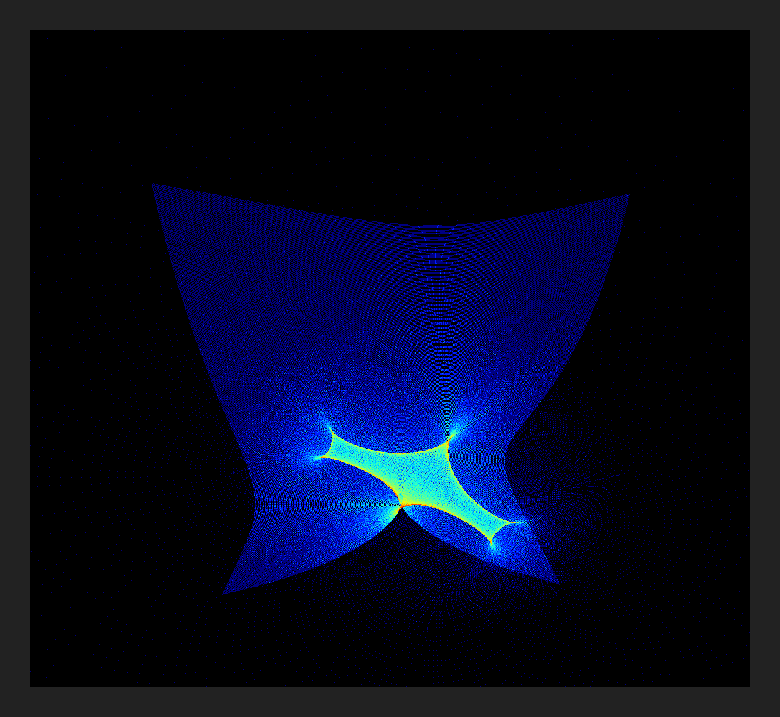

In [20]:
Gl.plot_magmap(
    # savepath='../plots/hubble_lens_magnification_map.jpg'  # uncomment to save
)